# Assignment 4: Becoming an Independent Data Scientist Example Solution

### 1. Region and Domain

- Region: United States
- Domain: Public Health and Macroeconomics

### 2. Research Question

- Question: How has COVID-19 affected mobility preferences/trends in the United States?

### 3. Links

- Apple Mobility Dataset Source: https://www.apple.com/covid19/mobility
- COVID-19 Daily Cases Dataset Source: https://covid19.who.int/?gclid=CjwKCAjwi_b3BRAGEiwAemPNU455IcDwDmovEEDAyFn4C8SpzmEKvOwpdmhpy-wuhVw8dk8SD2bLDxoCc_gQAvD_BwE

### 4. Image
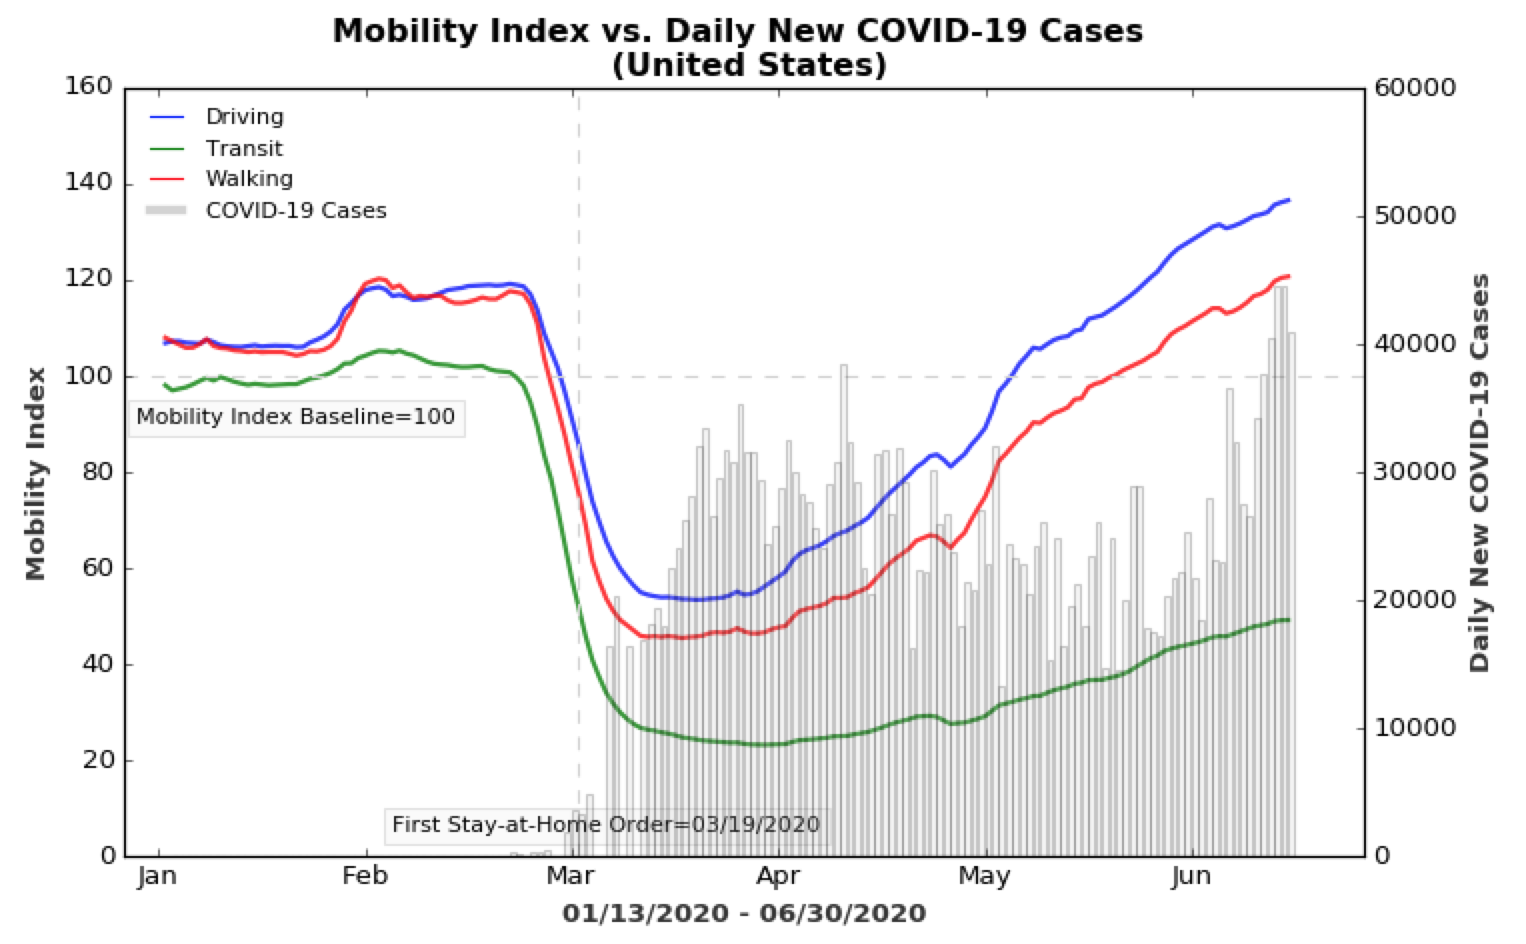


### 5. Discussion

- Motivation: The visual was concerned with answering the question of how has COVID-19 pandemic affected the mobility preferences of the people in the United States for the period of January 13th, 2020 - June 30th, 2020. COVID-19 related data was pulled from the WHO website, while the mobility data was pulled from Apple, which publishes the daily direction requests for driving, transit, and walking. Since almost half of the U.S. population are iOS users, this data can be used directionally to drive insights from the change in mobility preferences for pre, post, and during the COVID-19 pandemic.
- Footnote: Apple daily data is broken out by direction requests for driving, transit, and walking. The data is indexed on the first date available that is 01/13/2020, and is also the baseline (100). In the chart, I used these values as the primary axis and I did 7-day rolling average to showcase the trend. From the WHO dataset, I used daily new cases as the secondary axis with bar charts. The main purpose of this dataset is to provide the audience with the scale of the pandemic over time. In addition, I included two line charts one for the Mobility baseline, and one for the first time stay-at-home order was announced. My goal was to provide additional context to the audience that is looking at the chart.
- Insights: Roughly until the first stay-at-home order, all mobility preferences were mirroring each other in terms of trending, while the demand for driving and walking are above transit. As the number of COVID-19 cases increased, all mobility preferences started to see a significant decline. Since, perhaps the pandemic became the "new normal", the demand for direction requests started to bounce back especially for driving and walking. In the pre-COVID-19 era, the demand for driving and walking were almost the same, in the during-COVID-19 era although they are bouncing back with the same trend, driving demand has been significantly more than that of walking. Transit, on the other hand, bouncing back slowly, but with a huge gap, when compared to driving and walking. In addition, both the driving and walking indices are higher in the COVID-19 era vs. pre-COVID-19 era that is showcasing the fact that people avoid public transportation and the trend is also showcasing that driving and walking demands are offseting the need for transit demand.
- Final thoughts: While the data is to be used directionally, the analysis can provide useful insights on various planning and re-opening discussions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
#Apple Mobility Dataset Source: https://www.apple.com/covid19/mobility
mobility = pd.read_csv('apple_mobility.csv')

#COVID-19 Daily Cases Dataset Source: https://covid19.who.int/?gclid=CjwKCAjwi_b3BRAGEiwAemPNU455IcDwDmovEEDAyFn4C8SpzmEKvOwpdmhpy-wuhVw8dk8SD2bLDxoCc_gQAvD_BwE
#Top 5 : covid.groupby(' Country')[' New_cases'].sum().sort_values(ascending=False).head(5)
covid = pd.read_csv('covid_global_data.csv')

In [3]:
#Data cleaning 
#Apple Mobility
mobility1 = mobility[(mobility.region=='United Kingdom') | (mobility.region=='United States')].drop(['geo_type',
                                                                                'alternative_name', 'sub-region',
                                                                               'country'], axis=1).reset_index()

mobility_final = mobility1.transpose()[3:].rename(columns={0:'uk_driving', 1:'uk_transit', 2:'uk_walking',
                                          3:'us_driving', 4:'us_transit', 5:'us_walking'})

mobility_final = mobility_final.reset_index().rename(columns={'index':'date'})
mobility_final.date = pd.to_datetime(mobility_final.date)
mobility_final = mobility_final[mobility_final.date<='2020-06-30']
mobility_final = mobility_final.ffill()


#7-day rolling for a better story
def rolling(series):
    return series.rolling(window=7).mean()

rolling(mobility_final[['uk_driving', 'uk_transit', 'uk_walking', 'us_driving','us_transit', 'us_walking']])

mobility_final[['uk_driving', 'uk_transit', 'uk_walking', 'us_driving',
       'us_transit', 'us_walking']] = rolling(mobility_final[['uk_driving', 'uk_transit', 
                                                              'uk_walking', 'us_driving',
                                                              'us_transit', 'us_walking']])

#WHO Covid

covid1 = covid[(covid[' Country'] == 'The United Kingdom') | (covid[' Country'] == 'United States of America')][['Date_reported', 
                                                                                                                 ' Country', ' New_cases', ' Cumulative_cases', 
                                                                                                                 ' New_deaths', ' Cumulative_deaths']]

covid1 = covid1.rename(columns={'Date_reported': 'date', ' Country':'country', ' New_cases': 'new_cases', 
                       ' Cumulative_cases':'cumulative_cases',
       ' New_deaths':'new_deaths', ' Cumulative_deaths':'cumulative_deaths'})

covid_final = covid1.reset_index(drop=True)
covid_final.date = pd.to_datetime(covid_final.date)
covid_final = covid_final[covid_final.date<='2020-06-30']
covid_final = pd.pivot_table(data=covid_final, values='new_cases', columns='country', index='date').reset_index(drop=False).rename(columns={'The United Kingdom':'uk_cases', 'United States of America':'us_cases'})

#merge
df = pd.merge(left=mobility_final, right=covid_final, how='left', left_on='date', right_on='date')

<IPython.core.display.Javascript object>


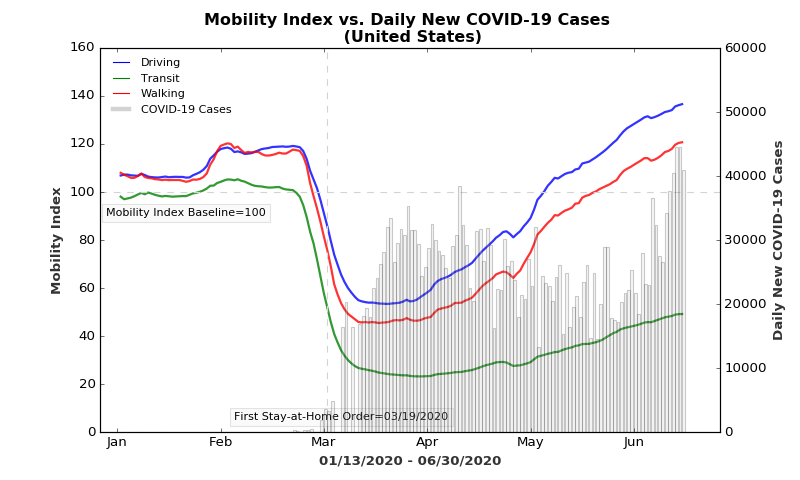

In [4]:
#US
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(range(len(df)), df.us_driving, label='Driving', linewidth=2, alpha=0.8)
ax1.plot(range(len(df)), df.us_transit, label='Transit', linewidth=2, alpha=0.8)
ax1.plot(range(len(df)), df.us_walking, label='Walking', linewidth=2, alpha=0.8)

ax2 = ax1.twinx()

ax2.bar(range(len(df)), df.us_cases, alpha=0.2, color='lightgrey', edgecolor="none")
ax2.set_ylim([0,60000])
ax1.set_ylim([0,160])


plt.title('Mobility Index vs. Daily New COVID-19 Cases \n (United States)', fontweight='bold')
ax1.set_ylabel('Mobility Index', fontweight='bold', alpha=0.8)
ax2.set_ylabel('Daily New COVID-19 Cases', fontweight='bold', alpha=0.8)
ax1.set_xlabel('01/13/2020 - 06/30/2020', fontweight='bold', alpha=0.8)
#ax1.legend(frameon=False, loc='upper left', prop={'size': 12})

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='blue', lw=1, label='Driving'),
                   Line2D([0], [0], color='green', lw=1, label='Transit'),
                   Line2D([0], [0], color='red', lw=1, label='Walking'),
                   Line2D([0], [0], color='lightgrey', lw=4, label='COVID-19 Cases')]
                   
                   

ax1.legend(handles=legend_elements, frameon=False, loc='upper left', prop={'size': 10})


y=100
horizontal = ax1.axhline(y=y, color='lightgray', linestyle='--')
y_text = ax1.text(x=25, y=90, s='Mobility Index Baseline=100', size=10, bbox=dict(facecolor='lightgrey', alpha=0.1), horizontalalignment='center')

x=66
vertical = ax1.axvline(x=x, color='lightgray', linestyle='--')
x_text = ax1.text(x=70, y=5, s='First Stay-at-Home Order=03/19/2020', size=10, bbox=dict(facecolor='lightgrey', alpha=0.1), horizontalalignment='center')


a = [0, 30, 60, 90, 120, 150]
b = [i+5 for i in a]

Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
plt.xticks(b, Month_name);